## Introducción a los Arboles de Desición 

### Cargando Librerias 

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Cargando Datos 

Los datos los podemos descargar del sitio web de stanford https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html si queremos trabajarlo desde el disco local, tambien esta disponible para descarga directa desde https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'


In [8]:
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv',sep=',')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


### Analisis Exploratorio de Datos 

#### Iniciamos con una visualización de los Datos 


In [10]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


#### Eliminando Variables que no nos interesan 

Para esto podemos realizar un analisis de correlación de pearson entre las variables 

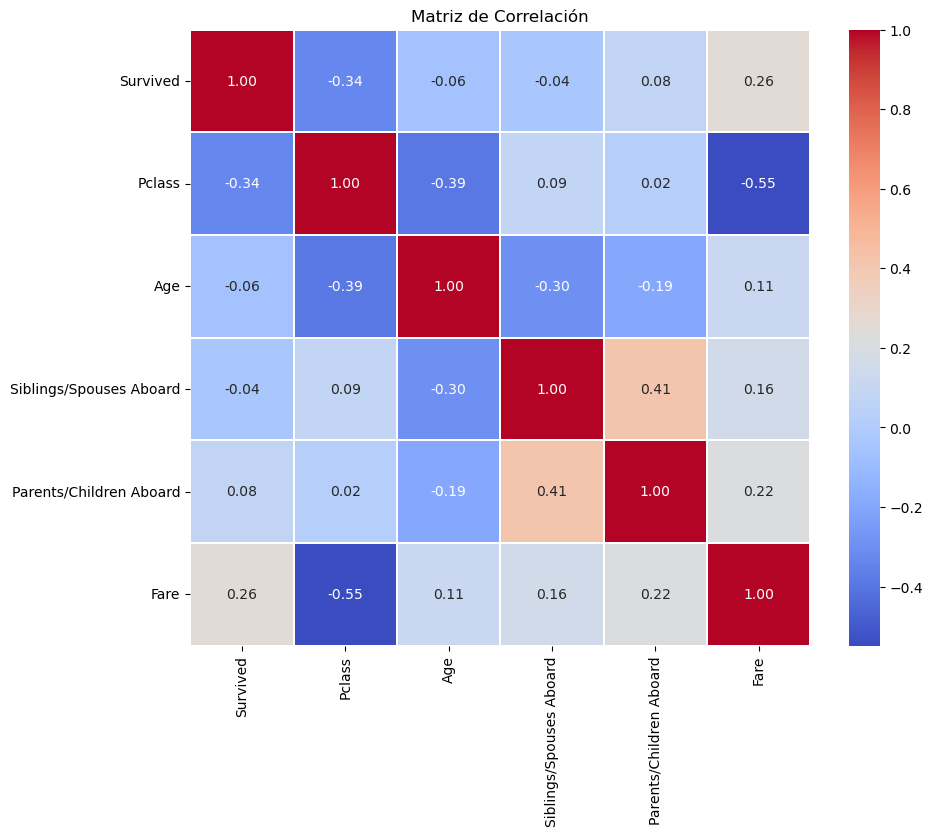

In [11]:
## Calculemos la matriz de correlación 

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.05)
plt.title('Matriz de Correlación')
plt.show()


En este sentido podemos identificar que existe una correlación "fuerte" entre la variable Pclass y Fare, en ese sentido es de esperarse que esto ocurra pues seguramente la tarifa dependera de la clase en donde el pasajero viajo. 

Para este ejercicio vamos a eliminar Fare y el Nombre pues este ultimo no tiene implicaciones respecto a quien muere o quien sobrevive. 


In [12]:
to_drop = ['Name','Fare']
df.drop(to_drop,axis='columns',inplace=True)

Ajustando los nombres de las Columnas por Comodidad     

In [13]:
df.columns=['Survived','Pclass','Sex','Age','S/Sp','P/C']
df.head(5)

,Survived,Pclass,Sex,Age,S/Sp,P/C
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### Revisando el data set usando el metodo INFO

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   S/Sp      887 non-null    int64  
 5   P/C       887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


### Trasformando la Variable Sex a una variable dummy usando el metodo get_dummies() de pandas



En ocaciones es necesario realizar el cambio del nombre de una de las columnas para eso podemos usar el metodo de pandas .rename()

In [33]:
df.rename(columns= {'Sex_male':'Sex'},inplace=True)
df

,Survived,Pclass,Age,Sib/Spo,Par/Chil,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
882,0,2,27.0,0,0,1
883,1,1,19.0,0,0,0
884,0,3,7.0,1,2,0
885,1,1,26.0,0,0,1


En ocaciones quisieramos cambiar el orden de las variables de nuestro data frame para esto podemos realizar lo siguiente

In [34]:
df = df[['Survived','Pclass','Age','Sex','Sib/Spo','Par/Chil']]
df

,Survived,Pclass,Age,Sex,Sib/Spo,Par/Chil
0,0,3,22.0,1,1,0
1,1,1,38.0,0,1,0
2,1,3,26.0,0,0,0
3,1,1,35.0,0,1,0
4,0,3,35.0,1,0,0
...,...,...,...,...,...,...
882,0,2,27.0,1,0,0
883,1,1,19.0,0,0,0
884,0,3,7.0,0,1,2
885,1,1,26.0,1,0,0


### Entrenamiento y Evaluación del Arbol de Desición 

El proceso de entrenamiento de un árbol de decisión comienza con el uso de un conjunto de datos de entrenamiento, sobre el cual el algoritmo aprende a tomar decisiones. En cada nodo del árbol, el modelo evalúa las características de los datos para encontrar la mejor división, maximizando la homogeneidad dentro de los grupos resultantes, utilizando métricas como la entropía o el índice Gini. Este proceso se repite de manera recursiva, creando una estructura de árbol hasta alcanzar nodos puros o hasta cumplir con un criterio de parada predefinido, como la profundidad máxima del árbol. Una vez entrenado, el modelo se evalúa utilizando un conjunto de datos de prueba independiente para verificar su capacidad de generalización y evitar el sobreajuste. Se pueden emplear métricas de evaluación como la precisión, el recall, el área bajo la curva ROC, o el error cuadrático medio, dependiendo de la naturaleza del problema (clasificación o regresión). Esta evaluación es crucial para entender el rendimiento del modelo en situaciones no vistas durante el entrenamiento y ajustar los parámetros del modelo si es necesario, asegurando así que el árbol de decisión resultante sea robusto, preciso y fiable en la toma de decisiones basadas en datos.

### Iniciamos con la separación entre variable a Predecir (y) y Variables Regresoras (x)

In [35]:
X=df.drop('Survived',axis='columns') ## Eliminamos la variable a predecir
y=df['Survived']


### División entre entrenamiento y prueba
La división de datos en conjuntos de entrenamiento y prueba es un paso crucial en el desarrollo de modelos de Machine Learning como los árboles de decisión. Esta práctica es esencial para evaluar de manera objetiva la capacidad de un modelo para generalizar aprendizajes a datos no vistos previamente. El conjunto de entrenamiento se utiliza para que el modelo aprenda las relaciones inherentes en los datos y construya la estructura de árbol óptima, mientras que el conjunto de prueba sirve para evaluar cómo el modelo entrenado se desempeña con datos que no ha visto durante su entrenamiento, proporcionando una estimación del rendimiento en escenarios del mundo real. Sin esta separación, corremos el riesgo de crear modelos que se ajusten demasiado a los datos de entrenamiento, un fenómeno conocido como sobreajuste, que compromete la habilidad del modelo para generalizar bien a nuevos datos, haciendo que las predicciones sean menos precisas y el modelo sea menos robusto y confiable. Esta división de datos asegura que se mantenga un equilibrio entre la capacidad de aprendizaje del modelo y su capacidad para generalizar, permitiendo así el desarrollo de árboles de decisión más efectivos y aplicables.

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Importando el Modelo de Clasificación 

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2,random_state=0)

### Entrenamiento del Modelo 

Imagina que estás creando un NPC en un videojuego, y deseas que tome las decisiones más acertadas posible. Al entrenar un árbol de decisión, le presentamos situaciones (datos) al NPC junto con las respuestas o acciones “correctas” que debe tomar en cada situación.

En el contexto de los árboles de decisión, la "optimización de la función objetivo" es como afinar y ajustar las decisiones de nuestro NPC para que sean lo más acertadas y efectivas posible. La función objetivo es como un “juez” que determina qué tan buena es una decisión que toma el NPC. Durante el entrenamiento, el árbol de decisión prueba diferentes preguntas y divisiones de los datos para encontrar las que maximicen la precisión de las decisiones del NPC, es decir, para hacer que la función objetivo esté lo más satisfecha posible.

Este proceso es iterativo; el modelo va aprendiendo y ajustándose con cada ejemplo, intentando siempre mejorar y optimizar las decisiones que toma el NPC. Por ejemplo, si el NPC tiene que decidir si atacar o defenderse, la función objetivo evaluará las decisiones del NPC basándose en el éxito de sus acciones, y el modelo se ajustará para hacer más probable que el NPC tome decisiones que aumenten sus posibilidades de éxito en el futuro.

En resumen, el proceso de optimización durante el entrenamiento es como enseñar y perfeccionar las habilidades de decisión de nuestro NPC, para que, cuando se enfrente a situaciones en el juego, pueda tomar las decisiones más acertadas y estratégicas basadas en lo que ha aprendido.

In [38]:
tree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluación del Modelo 

Piensa en el proceso de validación como si estuvieras enseñándole a un personaje de videojuego (un NPC) nuevas habilidades o tácticas. Una vez que le has enseñado al NPC cómo reaccionar en diferentes situaciones del juego (esto es, el entrenamiento del modelo), necesitas probarlo en un ambiente controlado para ver si realmente ha aprendido (la validación).

Imagina que luego de enseñarle al NPC cómo comportarse, lo introduces en un nivel de prueba donde enfrentará diferentes desafíos o enemigos. Observas cómo el NPC utiliza lo que ha aprendido para superar estos obstáculos. Si el NPC actúa de manera acertada y supera los desafíos eficientemente, entonces puedes confiar en que ha aprendido bien (el modelo está validado y es efectivo). Sin embargo, si el NPC falla o toma malas decisiones, entonces necesitarás revisar y ajustar lo que le has enseñado (optimizar el modelo) y probarlo nuevamente.

En resumen, la validación en el contexto de un videojuego sería como poner a prueba a tu NPC en situaciones de juego para asegurarte de que las tácticas y habilidades que le has enseñado son las correctas y efectivas, y que está listo para enfrentar los retos del juego real.

In [39]:
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

### Calculo de las Metricas

Imagina que estás jugando un videojuego donde tu personaje (un arquero) debe acertar flechas en un blanco. Cada vez que disparas una flecha, puede acertar en el blanco o fallar. Ahora, piensa en "accuracy" (precisión) como el porcentaje de flechas que realmente aciertas en el blanco en comparación con todas las flechas que disparaste. Si disparas 100 flechas y 85 aciertan en el blanco, tu "accuracy" es del 85%.

De manera similar, en el mundo del machine learning y, específicamente, en los árboles de decisión, el "accuracy" nos dice qué tan bien nuestro modelo (o arquero digital) está acertando sus "flechas" o predicciones. Si le mostramos 100 situaciones y acierta en 85, entonces su precisión es del 85%. Es una manera simple y rápida de saber qué tan bien está funcionando nuestro modelo. Sin embargo, al igual que en el tiro con arco, no siempre acertar en el blanco es la única métrica que importa; a veces, queremos saber más detalles, como qué tan cerca estuvimos del centro o si hay ciertas situaciones que nos resultan especialmente difíciles. Por eso, además de la "accuracy", los expertos usan otras métricas para evaluar y mejorar la precisión de sus modelos.

In [40]:
from sklearn.metrics import accuracy_score

## Acuracy en Train 

train_accuracy = accuracy_score(y_train,y_train_pred)

## Acuracy en Test

test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'El Accuracy en Train es {train_accuracy}')
print(f'El Accuracy en Test es {test_accuracy}')

El Accuracy en Train es 0.8048387096774193
El Accuracy en Test es 0.7640449438202247


### Revisamos el Feature Importances
Imagina que estás jugando un juego de detectives, y tienes que resolver un misterio usando varias pistas o elementos: una huella digital, un testigo, un video, etc. Algunas pistas son más útiles que otras para resolver el caso; por ejemplo, un video del crimen es más informativo que el testimonio de alguien que escuchó un ruido.

En el ámbito de los árboles de decisión, cada pista es como una característica o “feature” del modelo, y la “feature importance” nos dice cuánto ayuda cada característica a mejorar las predicciones del modelo, o en nuestro ejemplo, a resolver el misterio. Entonces, un valor de importancia alto indica que esa característica es muy útil para hacer predicciones acertadas, mientras que un valor bajo indica que la característica no es tan informativa.

Por tanto, al revisar la importancia de las características en un árbol de decisión, estamos evaluando qué variables o aspectos son los más relevantes y útiles para que nuestro “detective digital” resuelva el caso, o en otras palabras, para que el modelo haga predicciones precisas y acertadas.


<Axes: >

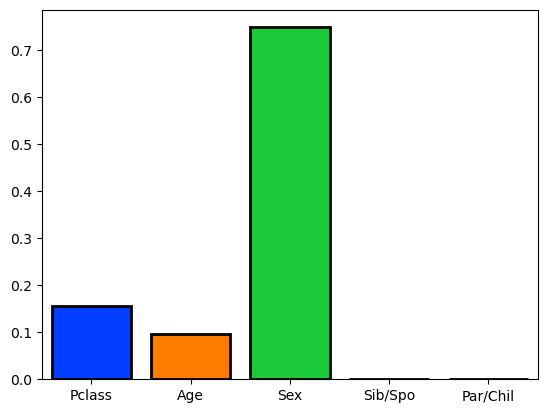

In [41]:

importances = tree.feature_importances_
columns=list(X.columns)
sns.barplot(x=columns,y=importances,palette='bright',saturation=2.0 ,edgecolor='black',linewidth=2)